<a href="https://colab.research.google.com/github/MaxYarosh/ML-projects/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# --- Генеруємо дані ---
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# --- 1. Аналітичне розв’язання (нормальне рівняння) ---
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Аналітичне рішення (theta):", theta_best.ravel())


# --- 2. Градієнтний спуск ---
eta = 0.1
n_iterations = 1000
m = len(X)

theta = np.random.randn(2, 1)  # випадкова ініціалізація

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print("Градієнтний спуск (theta):", theta.ravel())

Аналітичне рішення (theta): [4.21509616 2.77011339]
Градієнтний спуск (theta): [4.21509616 2.77011339]


In [4]:
# --- 3. Порівняння зі sklearn ---
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("sklearn (theta):", lin_reg.intercept_[0], lin_reg.coef_[0, 0])

sklearn (theta): 4.215096157546747 2.7701133864384837


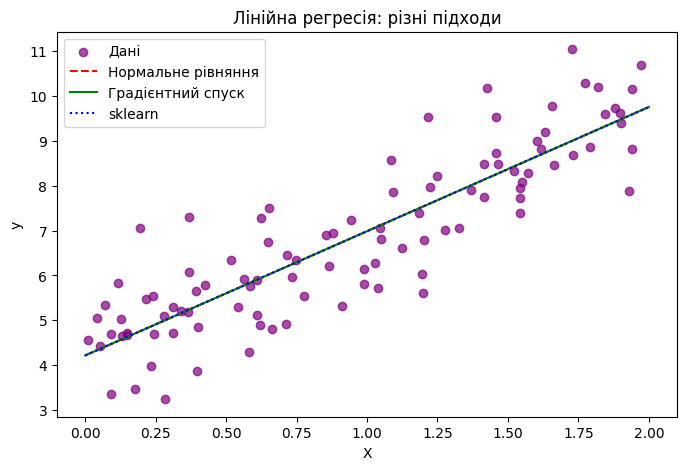

In [7]:
# --- Візуалізація ---
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, c = "purple", label="Дані")

# Лінії для передбачень
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict_analytic = X_new_b @ theta_best
y_predict_gd = X_new_b @ theta
y_predict_sklearn = lin_reg.predict(X_new)

plt.plot(X_new, y_predict_analytic, "r--", label="Нормальне рівняння")
plt.plot(X_new, y_predict_gd, "g-", label="Градієнтний спуск")
plt.plot(X_new, y_predict_sklearn, "b:", label="sklearn")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Лінійна регресія: різні підходи")
plt.show()
